# Project 3 - Regression

### Utilizing Housing Data to Implement Regression Models

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

## Experiment 1


In [5]:
df = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 3 - Predicting Housing Prices with Linear Regression/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Pre-Processing

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Our first step will be to change our 'SalePrice' Column into an integer data type

In [7]:
df['SalePrice'] = df['SalePrice'].astype('int16')
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int16
Length: 81, dtype: object

## Data Understanding

#### The effort of this phase is to get a deeper understanding of relationships amongst the data and any interesting charactersitics/ attributes within that the fields

##### Given that the target feature I'm interested in are the housing prices or 'SalePrice' I will examine if there are any relationships or strong correlations

<AxesSubplot:xlabel='SaleCondition', ylabel='LotArea'>

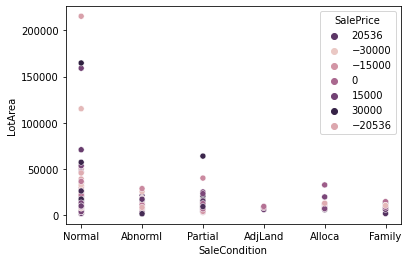

In [9]:
sns.scatterplot(data = df, x= 'SaleCondition', y = 'LotArea', hue= 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

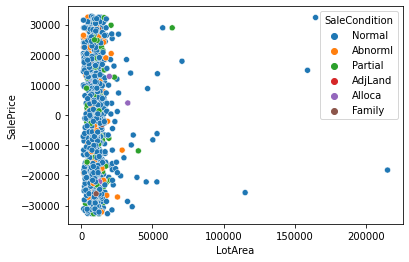

In [10]:
sns.scatterplot(data = df, x= 'LotArea', y = 'SalePrice', hue= 'SaleCondition')

<AxesSubplot:xlabel='SalePrice', ylabel='SaleCondition'>

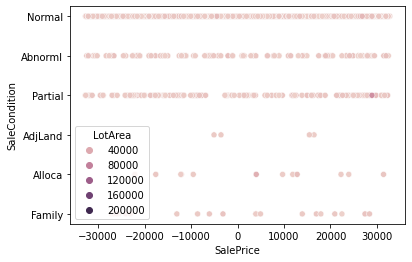

In [11]:
sns.scatterplot(data = df, x= 'SalePrice', y = 'SaleCondition', hue= 'LotArea')

<AxesSubplot:>

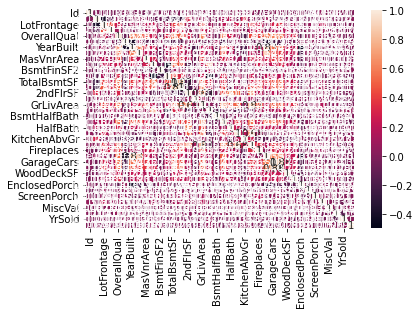

In [12]:
corr = df.corr()
sns.heatmap(corr, annot = True)

## Modeling

Now that we have a better understanding of the model, it seems as if 'LotArea' would be an ideal indicator for 'SalePrice', so we can use this for our linear regression model 

In [16]:
x = df[['LotArea']]
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [17]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

In [19]:
print('Coefficients: \n', linreg.coef_)
print('Intercept: \n', linreg.intercept_)

Coefficients: 
 [0.00089619]
Intercept: 
 -169.0109851590509


In [20]:
y_pred= linreg.predict(x_test)
mean_squared_error(y_test, y_pred)

337827836.0379055

In [21]:
x = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(x)
print(rmse)

18380.093471957793
